# Business Motive

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

## About Dataset


**'application_data.csv'**  contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.

## Data observation

- **Importing Requires libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
from scipy import stats
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")


- **Reading datasets**

In [3]:
app_data = pd.read_csv('application_data.csv')
prev_app_data = pd.read_csv('previous_application.csv')

- **Data Types overview for each column.**

In [4]:
app_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [5]:
prev_app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

## Identifying Missing data

In [6]:
missing_values = app_data.isnull().sum()
missing_values

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [7]:
columns_with_null_counts = app_data.isnull().sum()
columns_with_null = columns_with_null_counts[columns_with_null_counts > 0]
print(columns_with_null)

AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
OWN_CAR_AGE                   202929
OCCUPATION_TYPE                96391
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
Length: 67, dtype: int64


Here there are total **67** columns are having null values in it, however all the columns are not visible here to analyse the number of data there are present. To understand the missing values in detail we all plot a graph to visualize data counts.

- **Ploting graph to visualize the missing values.**

<AxesSubplot:>

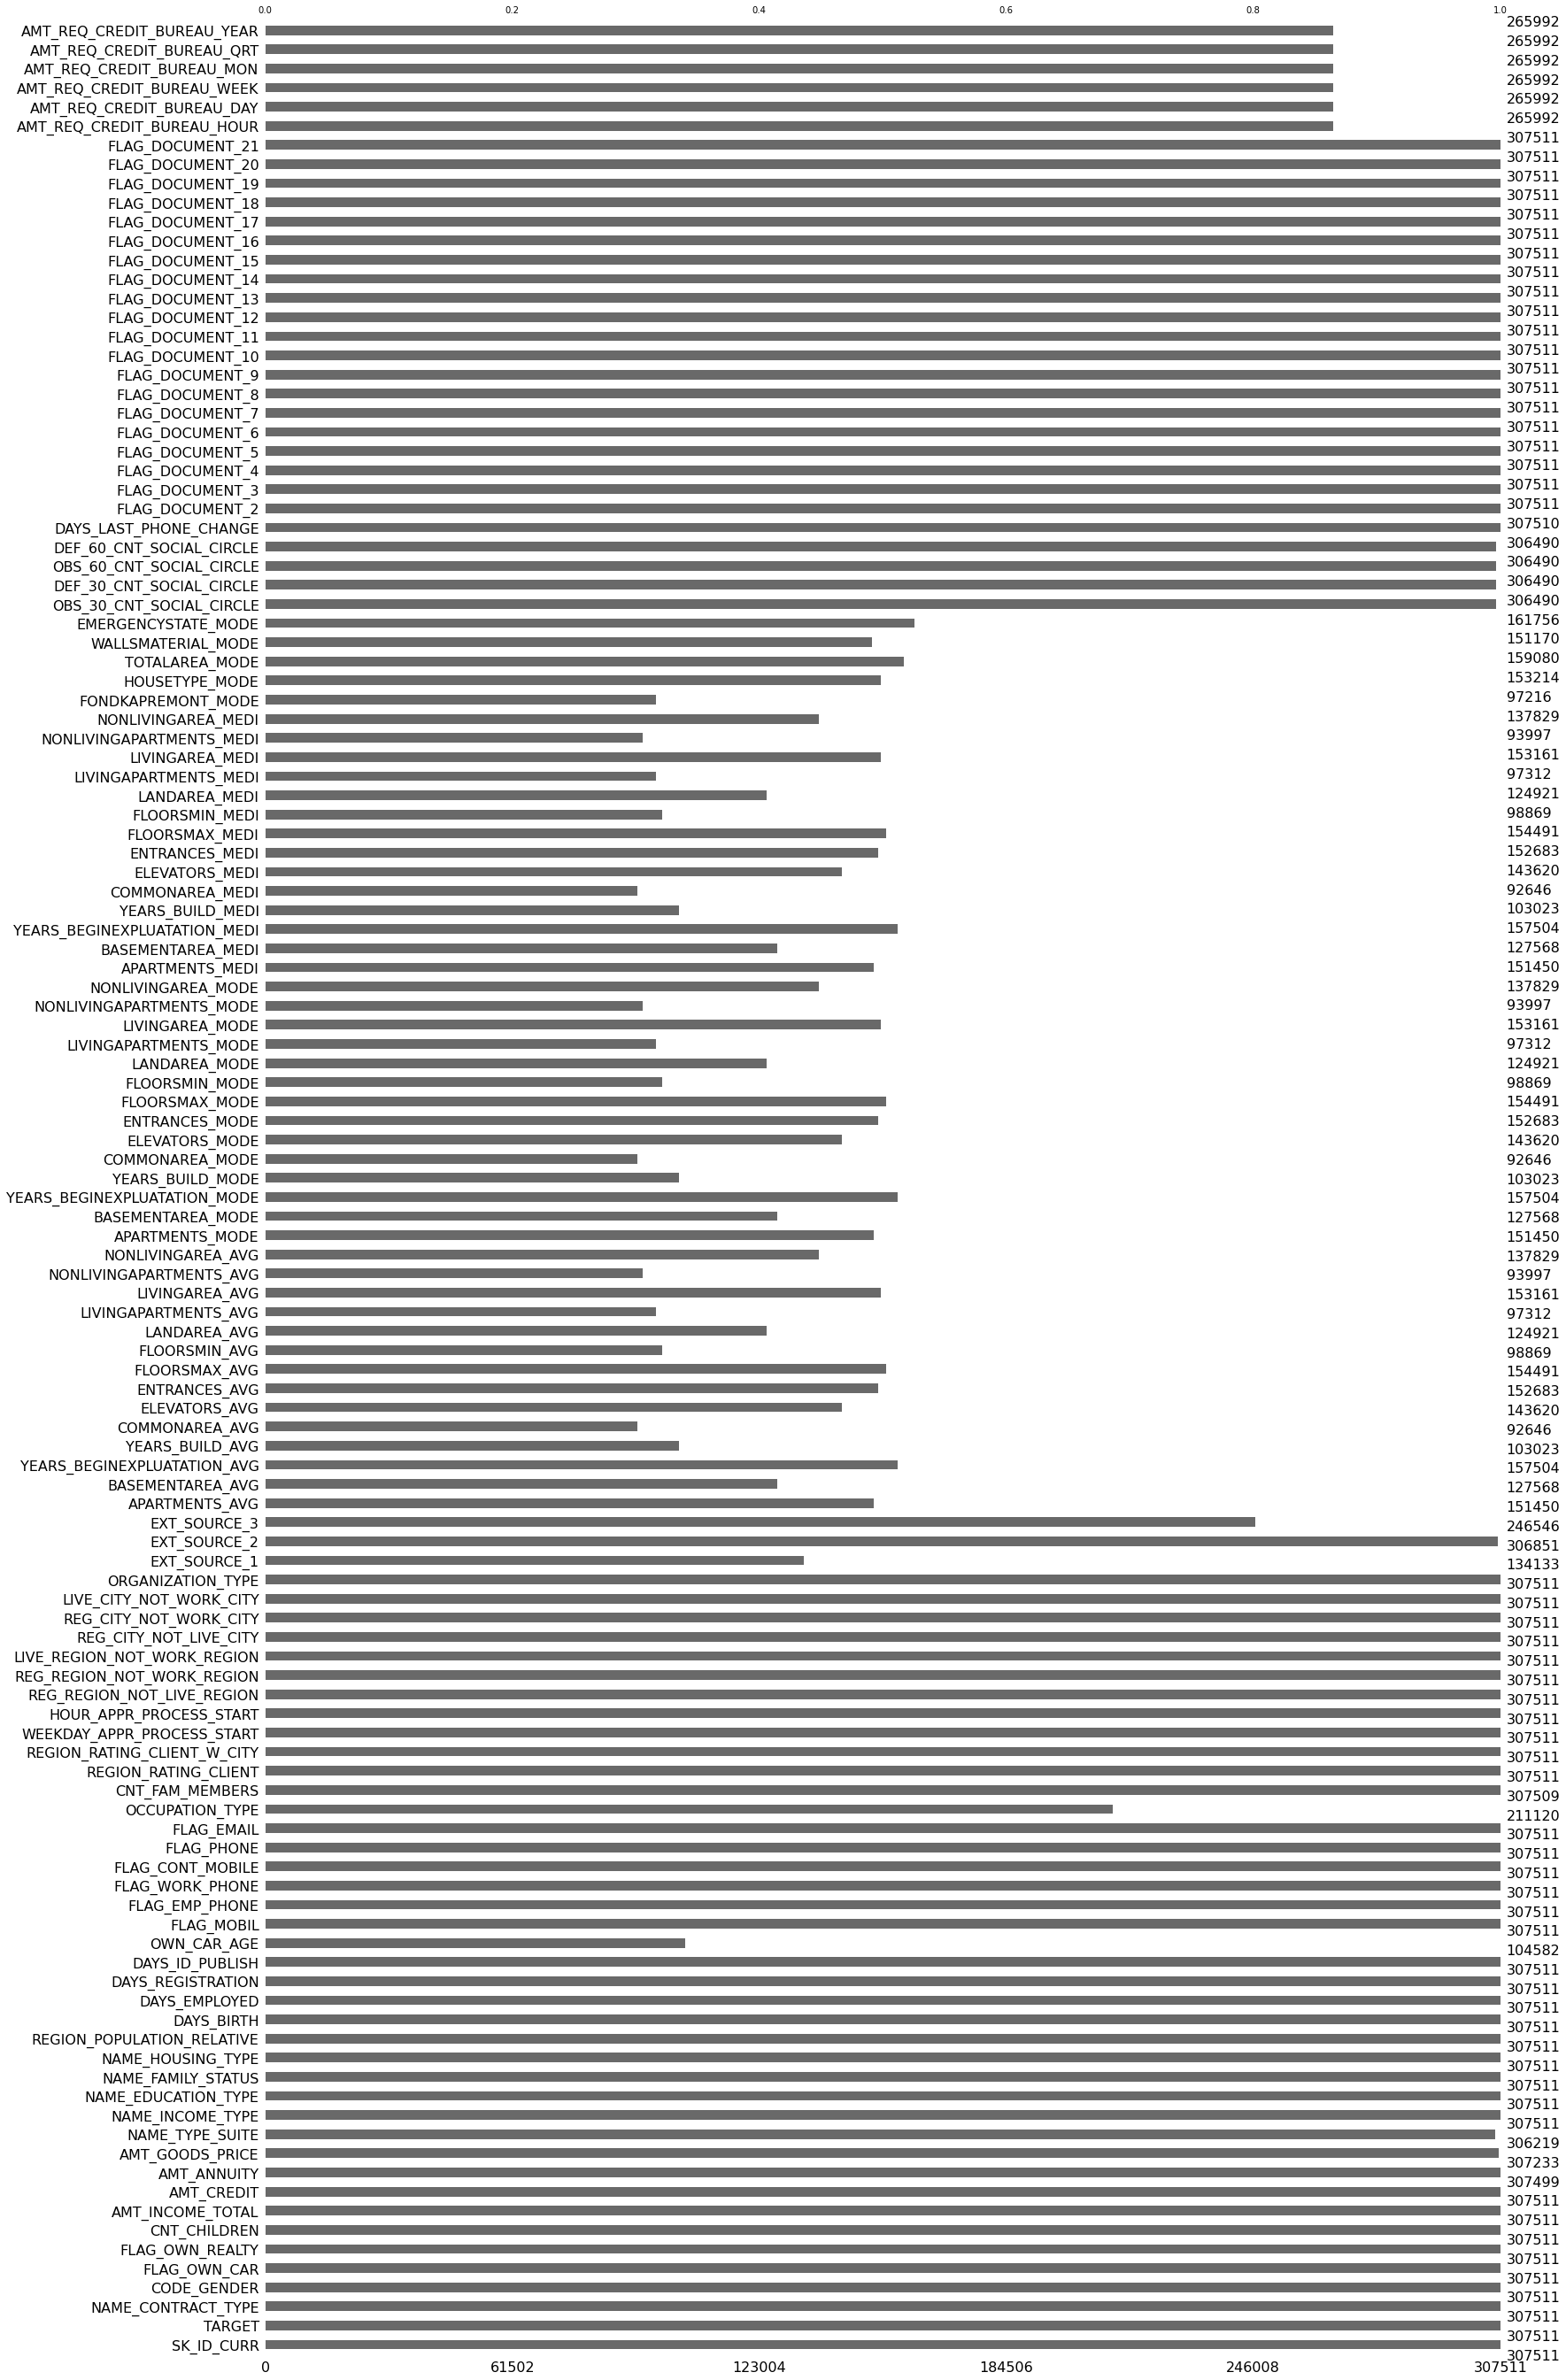

In [8]:
msn.bar(app_data)

From upper graph we can interprete that the multiple columns are having number of missing values in it. The uper given graph clearly helps to recognize the missing data very easily.

## Handling Missing values

- **Why is it important to handle missing values in a dataset?**

The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values. In the given dataset there total 67 columns are there which have the missing values in it. We will use the couple of approaches to handle those data.

### Approach 1:
We'll identify columns containing null values exceeding 40% and subsequently remove these columns from the dataset. This approach is ideal as it's preferable not to impute null data based on the remaining 60% of the dataset.

- **Analysing the count of columns having missing values more than 40%**

In [9]:
emptycol = app_data.isnull().sum()
emptycol = emptycol[emptycol.values > (0.4 * len(app_data))]
print(f"Columns having null values > 40%: {len(emptycol)}")

Columns having null values > 40%: 49


Here, it's evident that 49 columns exhibit a missing data ratio of 40%. So we will drop all of those columns to handle missing values.

- **Droping colunms having 40% of missing value in data.**

In [10]:
emptycol = list(emptycol[emptycol.values >= 0.3].index)
app_data.drop(labels=emptycol, axis=1, inplace=True)
print(f"Columns removed: {len(emptycol)}")

Columns removed: 49


We had droped the missing columns. As a next step will look for the remaining columns with missing data.

In [11]:
columns_with_null_counts = app_data.isnull().sum()
columns_with_null = columns_with_null_counts[columns_with_null_counts > 0]
print(columns_with_null)

AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
OCCUPATION_TYPE               96391
CNT_FAM_MEMBERS                   2
EXT_SOURCE_2                    660
EXT_SOURCE_3                  60965
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
DAYS_LAST_PHONE_CHANGE            1
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
dtype: int64


Here, we can see the remaining columns with its count of missing values.

### Approach 2: 

- **Imputation Method: Use median imputation.**
Reasoning: Highly skewed columns have extreme values or outliers. Median imputation is more robust to outliers than mean imputation.
For Columns with Skewness between -1 and -0.5 or between 0.5 and 1:

- **Imputation Method: Use mean imputation.**
Reasoning: Moderately skewed columns have less extreme deviations, and mean imputation can work reasonably well.
For Columns with Skewness between -0.5 and 0.5 (approximately symmetric):

- **Imputation Method: Use mean or median based on data distribution.**
Reasoning: Nearly symmetrically distributed columns can be imputed with either mean or median based on a detailed analysis of data characteristics.

In [12]:
numeric_columns_with_null = [
    'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS',
    'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
    'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'
]
print("Analysing skewness of each column")
for i in numeric_columns_with_null:
    skewness = app_data[i].skew()
    print(i, skewness)

Analysing skewness of each column
AMT_ANNUITY 1.5797773638612507
AMT_GOODS_PRICE 1.3490003414747445
CNT_FAM_MEMBERS 0.9875428137192184
EXT_SOURCE_2 -0.7935760449636996
EXT_SOURCE_3 -0.4093904596160267
OBS_30_CNT_SOCIAL_CIRCLE 12.13959776486944
DEF_30_CNT_SOCIAL_CIRCLE 5.183517952420263
OBS_60_CNT_SOCIAL_CIRCLE 12.070828697697412
DEF_60_CNT_SOCIAL_CIRCLE 5.27787829269804
DAYS_LAST_PHONE_CHANGE -0.7136056678591622
AMT_REQ_CREDIT_BUREAU_HOUR 14.534062061826708
AMT_REQ_CREDIT_BUREAU_DAY 27.043504708921265
AMT_REQ_CREDIT_BUREAU_WEEK 9.293572551814966
AMT_REQ_CREDIT_BUREAU_MON 7.804848087437468
AMT_REQ_CREDIT_BUREAU_QRT 134.3657760491256
AMT_REQ_CREDIT_BUREAU_YEAR 1.243590004141659


Here, we can see the skewness of each columns and now bifercate them all to different lists.

In [13]:
columns_skewed_highly = ['AMT_REQ_CREDIT_BUREAU_QRT']

In [14]:
columns_skewed_moderate = [
    'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_MON', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
    'AMT_REQ_CREDIT_BUREAU_YEAR'
]

In [15]:
columns_skewed_approx_symmetric = ['CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE']

In [16]:
for column in columns_skewed_highly:
    app_data[column].fillna(app_data[column].median(), inplace=True)

for column in columns_skewed_moderate:
    app_data[column].fillna(app_data[column].mean(), inplace=True)

for column in columns_skewed_approx_symmetric:
    app_data[column].fillna(app_data[column].mean(), inplace=True)

We had imputed the data with different approaches based on the skewness for all the numeric columns. Although we also have two column '**NAME_TYPE_SUITE**', '**ORGANIZATION_TYPE**' and '**OCCUPATION_TYPE**' wich has non-numerical data. So we will use the median imputation to handle those data.

In [17]:
app_data['ORGANIZATION_TYPE']

0         Business Entity Type 3
1                         School
2                     Government
3         Business Entity Type 3
4                       Religion
                   ...          
307506                  Services
307507                       XNA
307508                    School
307509    Business Entity Type 1
307510    Business Entity Type 3
Name: ORGANIZATION_TYPE, Length: 307511, dtype: object

In [18]:
app_data['NAME_TYPE_SUITE'].fillna(app_data['NAME_TYPE_SUITE'].mode()[0], inplace=True)
app_data['ORGANIZATION_TYPE'].fillna(app_data['ORGANIZATION_TYPE'].mode()[0], inplace=True)
app_data['OCCUPATION_TYPE'].fillna(app_data['OCCUPATION_TYPE'].mode()[0], inplace=True)

Here, we analyzed that there are some values as '**XNA**' which is considered to be null values, so we will idebtify the data with such values and also impute it.

- **Identify columns containing 'XNA' values**

In [19]:
columns_with_xna = app_data.columns[app_data.isin(['XNA']).any()].tolist()
print(columns_with_xna)

['CODE_GENDER', 'ORGANIZATION_TYPE']


There are two columns having 'XNA' values we will impute it by the median values.

In [20]:
app_data['CODE_GENDER'] = app_data['CODE_GENDER'].replace('XNA', np.nan)
app_data['CODE_GENDER'].fillna(app_data['CODE_GENDER'].mode()[0], inplace=True)

In [21]:
app_data['ORGANIZATION_TYPE'] = app_data['ORGANIZATION_TYPE'].replace('XNA', np.nan)
app_data['ORGANIZATION_TYPE'].fillna(app_data['ORGANIZATION_TYPE'].mode()[0], inplace=True)

In [22]:
columns_with_null_counts = app_data.isnull().sum()
columns_with_null = columns_with_null_counts[columns_with_null_counts > 0]
print(columns_with_null)

Series([], dtype: int64)


In the above output we can clearly see that we had imputed all the missing values present in the dataset using various approaches.

- **Plotting graph to make sure of null values in dataset**

<AxesSubplot:>

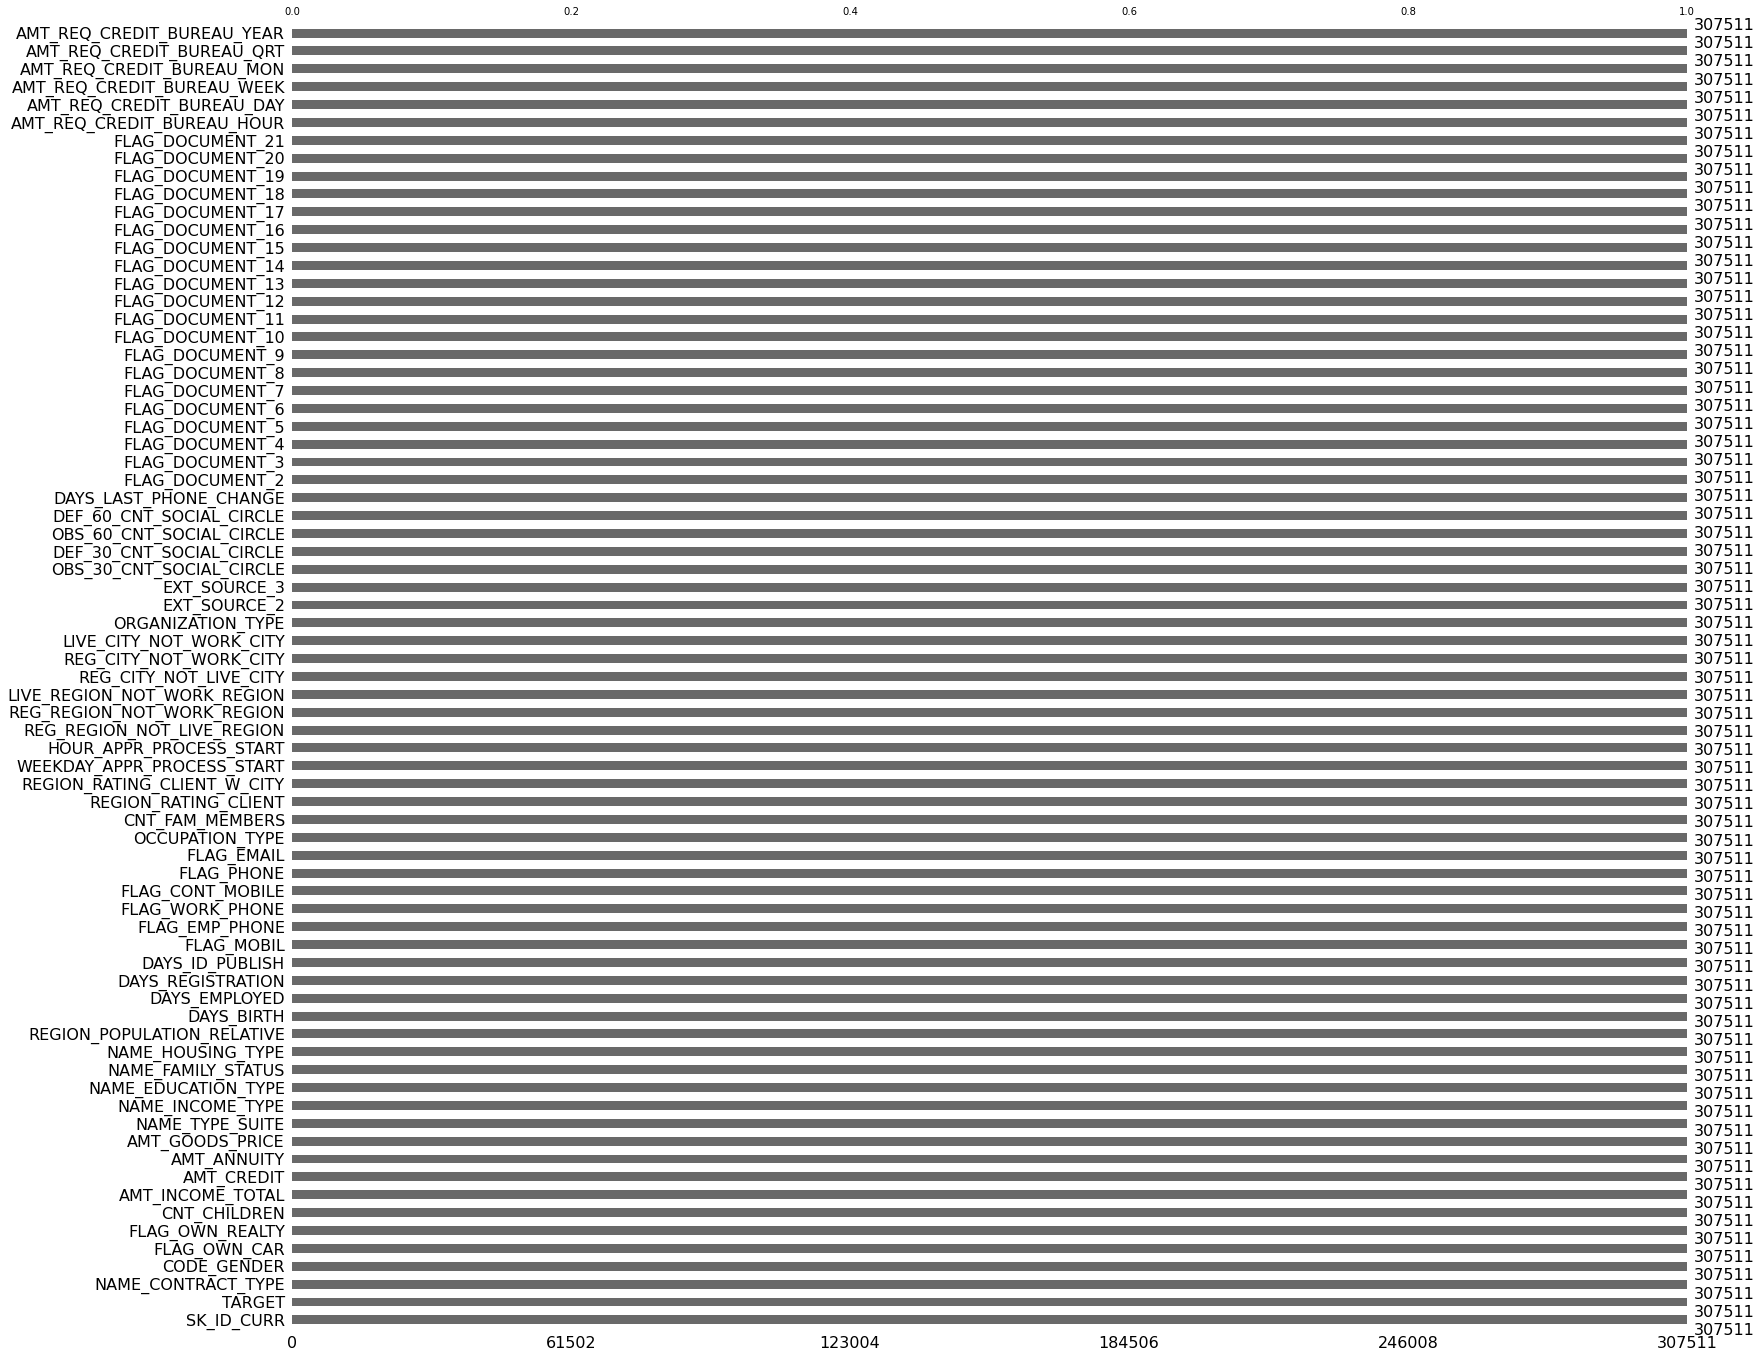

In [23]:
msn.bar(app_data)

## Identifying Outliers

An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. In a sense, this definition leaves it up to the analyst (or a consensus process) to decide what will be considered abnormal.

- **Why is it necessary to handle outliers?**

Outliers can have a big impact on your statistical analyses and skew the results of any hypothesis test if they are inaccurate. These extreme values can impact your statistical power as well, making it hard to detect a true effect if there is one.

- **Analysing the outliers for some of the columns.**

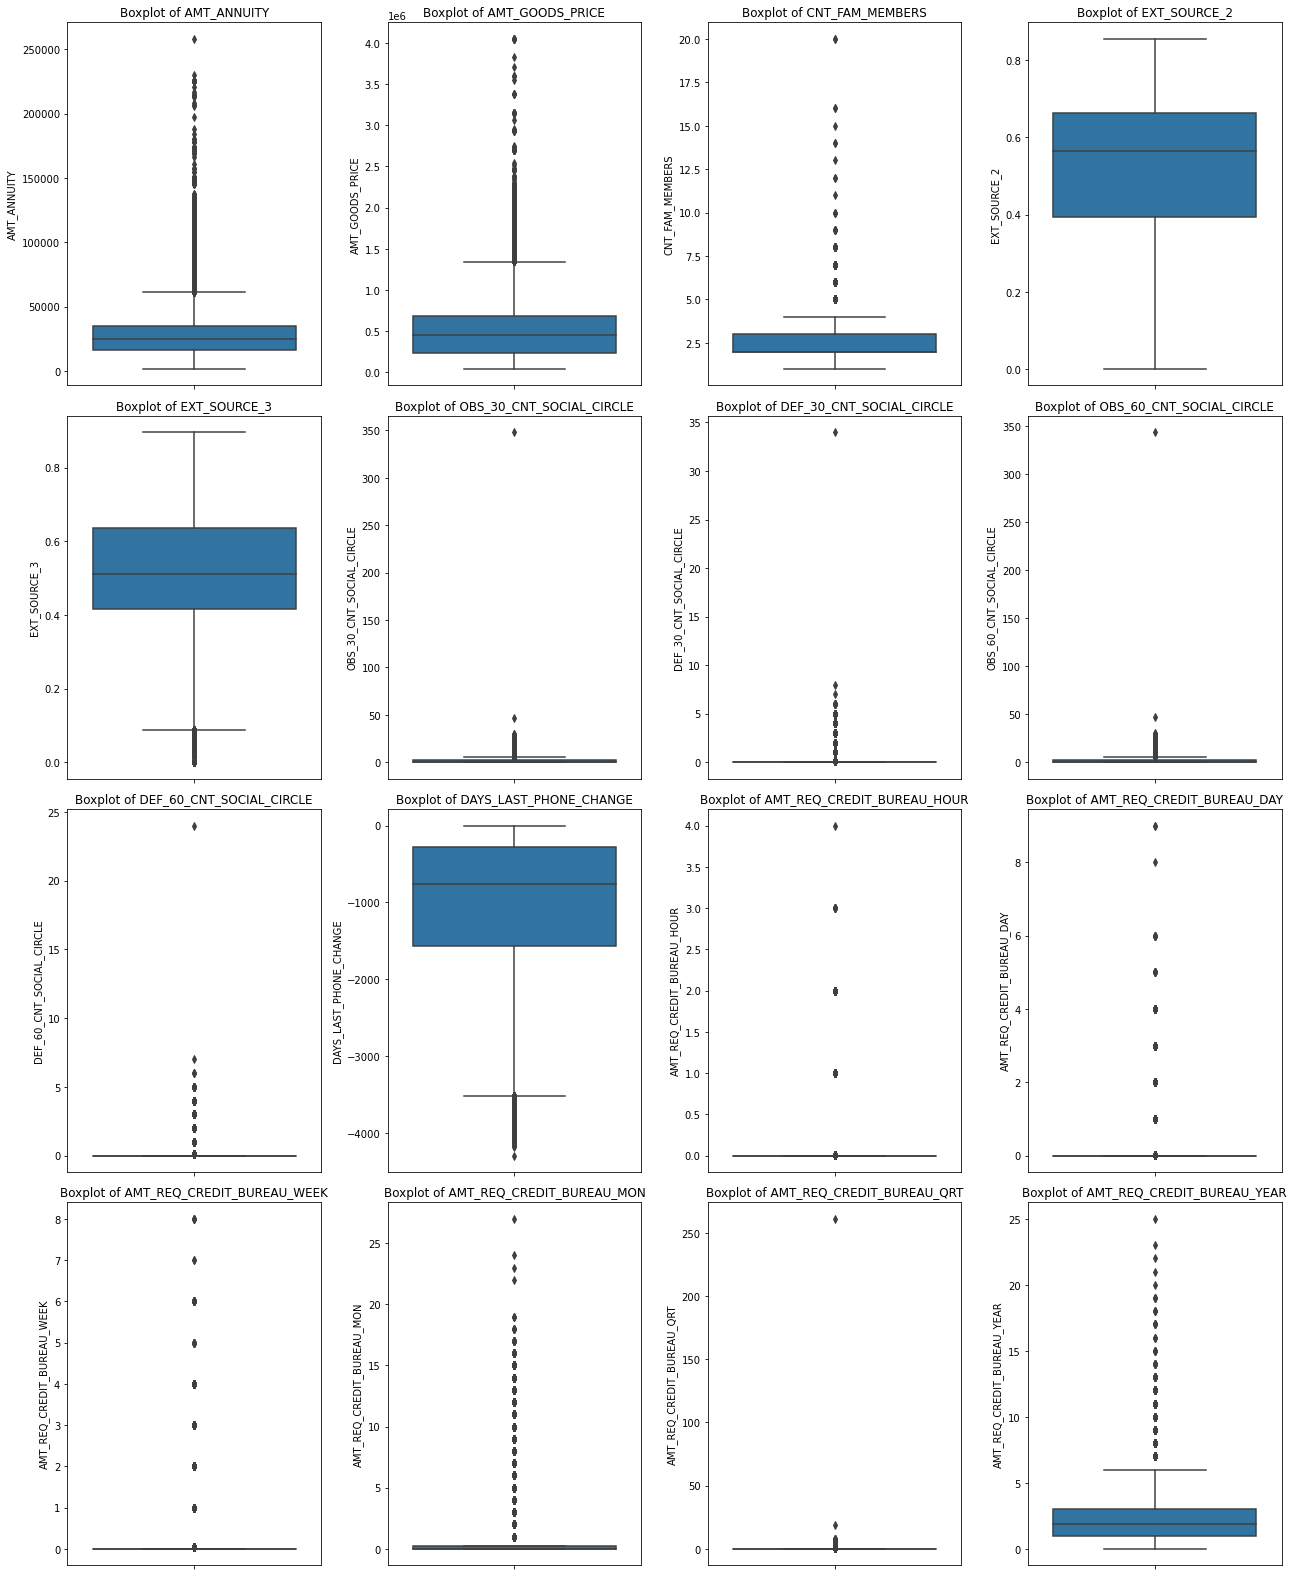

In [24]:
# Columns to examine for outliers
columns_to_examine = [
    'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
    'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
    'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
    'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'
]

num_cols = 4 
num_rows = (len(columns_to_examine) + num_cols - 1) // num_cols 

plt.figure(figsize=(18, 22))
for i, col in enumerate(columns_to_examine, start=1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(y=app_data[col])
    plt.title(f'Boxplot of {col}')
    plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()


Based on the boxplots, it's evident that several columns contain a considerable number of outliers.

## Handing outliers: 

We will handle outliers by capping extreme values in specified columns of a DataFrame. For that we will create function wich do the following:

**Function Overview:**
- **Parameters:**
    - `df`: Represents the DataFrame requiring outlier treatment.
    - `columns`: A list of columns where outliers are suspected and need to be managed.
    - `threshold`: A default threshold value set at 3, used to identify outliers based on z-scores.
- **Processing Steps:**
    - For each column in the specified list (`columns`), the function calculates z-scores for the column's values.
    - Outliers are identified based on the defined threshold, using z-scores.
    - Any identified outliers surpassing the threshold are capped by setting them to the threshold value (either positive or negative z-score values).
- **Returns:**
    - The modified DataFrame with capped outliers in the specified columns.

**Reasoning Behind Z-scores:**
Z-scores are a statistical measure that standardizes the distribution of data, expressing each value's deviation from the mean in terms of the standard deviation. This approach is valuable in outlier detection as it provides a quantifiable metric for how far each data point is from the mean in terms of standard deviations. Utilizing z-scores allows the function to objectively identify extreme values beyond a certain threshold (commonly set at 3 standard deviations) and subsequently cap them, ensuring a more balanced and less skewed dataset for analysis or modeling purposes.

In [25]:
def cap_outliers(df, columns, threshold=3):
    for col in columns:
        z_scores = np.abs(stats.zscore(df[col]))
        outliers = z_scores > threshold
        df.loc[outliers, col] = np.sign(df.loc[outliers, col]) * threshold
    
    return df

columns_with_outliers = [
    'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
    'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
    'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
    'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'
]

app_data = cap_outliers(app_data, columns_with_outliers)

In [26]:
app_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.0,1.000000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.0,0.000000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.0,0.000000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.006402,0.007,0.034362,0.267395,0.0,1.899974
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,0.006402,0.007,0.034362,0.267395,0.0,1.899974
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,0.006402,0.007,0.034362,0.267395,0.0,1.899974
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,3.000000,0.000,0.000000,1.000000,0.0,1.000000
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.0,0.000000


Here, we've effectively managed outliers using the defined function, resulting in a dataset with capped extreme values. We can further visualize this outlier treatment by employing boxplots to provide a clear illustration of how the extreme values were adjusted and managed within the dataset.



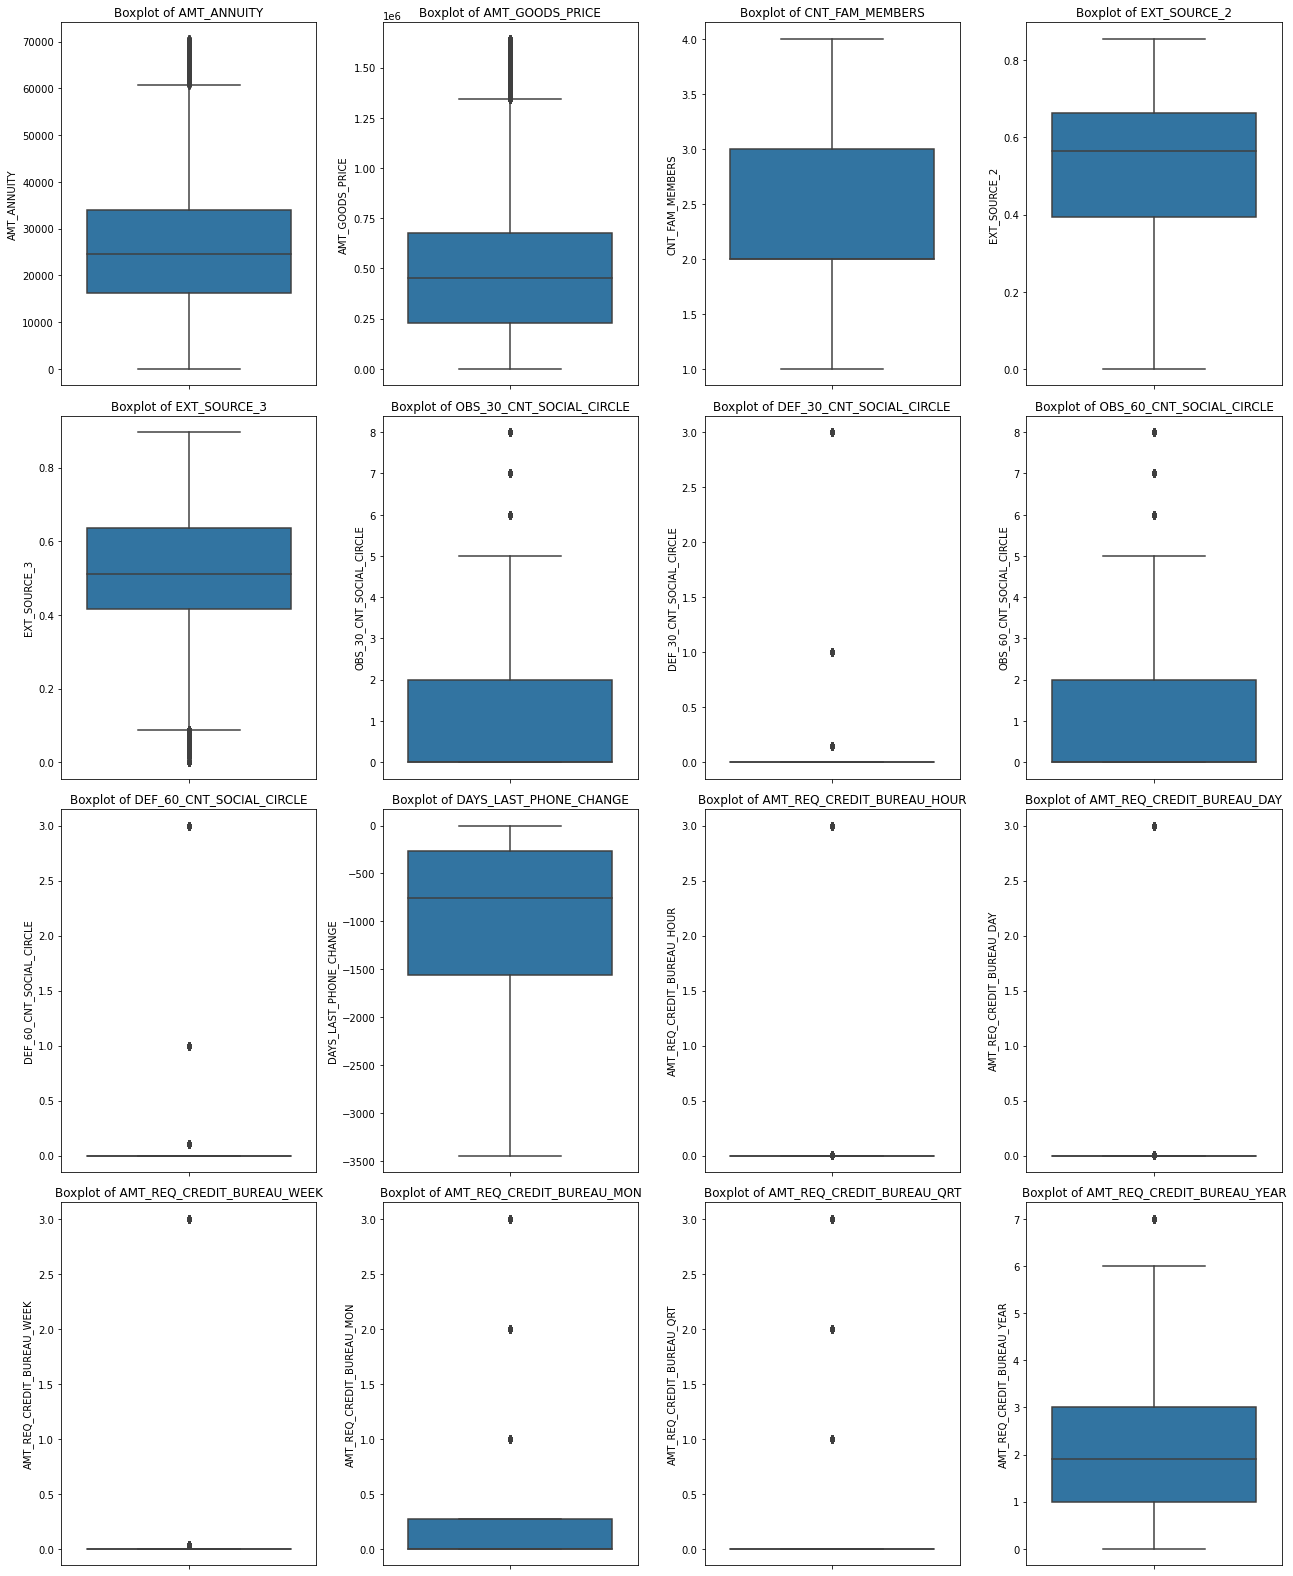

In [27]:
columns_to_examine = [
    'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
    'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
    'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
    'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'
]


num_cols = 4  
num_rows = (len(columns_to_examine) + num_cols - 1) // num_cols  
plt.figure(figsize=(18, 22))
for i, col in enumerate(columns_to_examine, start=1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(y=app_data[col])
    plt.title(f'Boxplot of {col}')
    plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()


Handling outliers is crucial in data analysis and modeling because outliers can significantly affect the statistical properties of a dataset, skewing the results and impacting the performance of machine learning algorithms. 

## Categorizing 'AMT_INCOME_TOTAL' and 'AMT_CREDIT'

In order to simplify the analysis of two columns, **'AMT_INCOME_TOTAL'** and **'AMT_CREDIT'**, we employed a categorization technique to group the continuous numerical values into distinct bins. This process was based on specific criteria such as quartiles, equal-width intervals, and equal-frequency intervals.

#### For 'AMT_INCOME_TOTAL':
- Four distinct groups were created using quartiles, labeled as **'Low'**, **'Medium'**, **'High'**, and **'Very High'**.
- Additionally, we segmented the income amounts into eleven groups utilizing equal-width bins ranging from **'0-50k'** to **'500k and above'**.

#### For 'AMT_CREDIT':
- Four categories were established based on quartiles, tagged as **'Low'**, **'Medium'**, **'High'**, and **'Very High'**.
- Moreover, credit amounts were classified into four quantile-based groups identified as **'Q1'**, **'Q2'**, **'Q3'**, and **'Q4'**.

This systematic approach enhances the interpretability and comparability of income and credit amounts. It enables a clearer understanding of their distributions, facilitating easier analysis within these grouped categories.

In [28]:
app_data['INCOME_QUARTILE_RANGE'] = pd.qcut(app_data['AMT_INCOME_TOTAL'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

In [29]:
bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, app_data['AMT_INCOME_TOTAL'].max()]
labels = ['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k', '250k-300k', '300k-350k', '350k-400k', '400k-450k', '450k-500k', '500k and above']
app_data['INCOME_WIDTH_RANGE'] = pd.cut(app_data['AMT_INCOME_TOTAL'], bins=bins, labels=labels)


In [30]:
app_data['CREDIT_QUANTILE_RANGE'] = pd.qcut(app_data['AMT_CREDIT'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

In [31]:
app_data['CREDIT_EQUAL_FREQ_RANGE'] = pd.qcut(app_data['AMT_CREDIT'], q=[0, 0.25, 0.5, 0.75, 1], labels=['Q1', 'Q2', 'Q3', 'Q4'])

## Checking imbalance in dataset

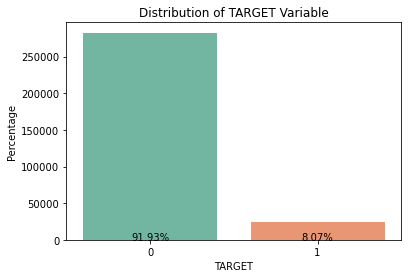

In [32]:
target_counts = app_data['TARGET'].value_counts()
total_count = len(app_data)
percentages = (target_counts / total_count) * 100

plt.figure(figsize=(6, 4))
sns.countplot(data=app_data, x='TARGET', palette='Set2')

for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center')

plt.title('Distribution of TARGET Variable')
plt.xlabel('TARGET')
plt.ylabel('Percentage')
plt.show()

From the given graph it is concluded that the data is heavily imbalanced, comprising 91.93% instances labeled as '0' and the remaining labeled as '1'.

- **Examine the distribution**

In [33]:
df_0 = app_data[app_data["TARGET"] == 0]
df_1 = app_data[app_data["TARGET"] == 1]

- **Distribution of 'Income Quartile Range' and 'Income Width Range' with respect to two target variables**

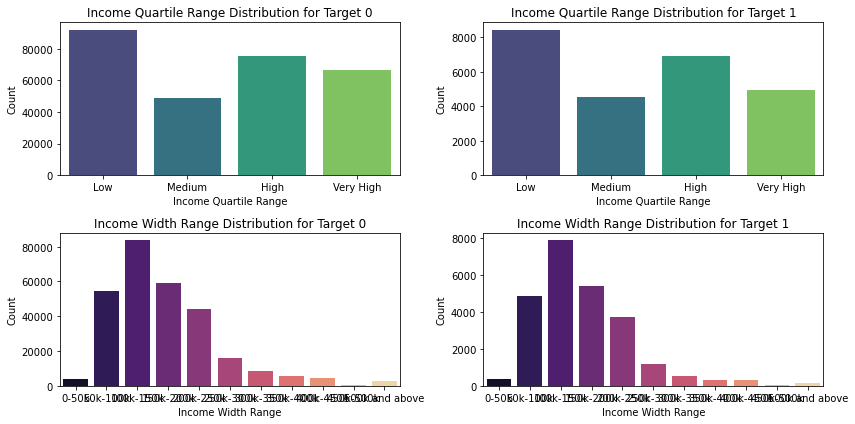

In [34]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.countplot(data=df_0, x='INCOME_QUARTILE_RANGE', palette='viridis')
plt.title('Income Quartile Range Distribution for Target 0')
plt.xlabel('Income Quartile Range')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
sns.countplot(data=df_1, x='INCOME_QUARTILE_RANGE', palette='viridis')
plt.title('Income Quartile Range Distribution for Target 1')
plt.xlabel('Income Quartile Range')
plt.ylabel('Count')

plt.subplot(2, 2, 3)
sns.countplot(data=df_0, x='INCOME_WIDTH_RANGE', palette='magma')
plt.title('Income Width Range Distribution for Target 0')
plt.xlabel('Income Width Range')
plt.ylabel('Count')

plt.subplot(2, 2, 4)
sns.countplot(data=df_1, x='INCOME_WIDTH_RANGE', palette='magma')
plt.title('Income Width Range Distribution for Target 1')
plt.xlabel('Income Width Range')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

From the following graphs it is potraited that there is not much difference in distributions for both the columns.

- **Distribution of 'AMT_INCOME_RANGE' and 'AMT_CREDIT_RANGE1' with respect to two target variables**

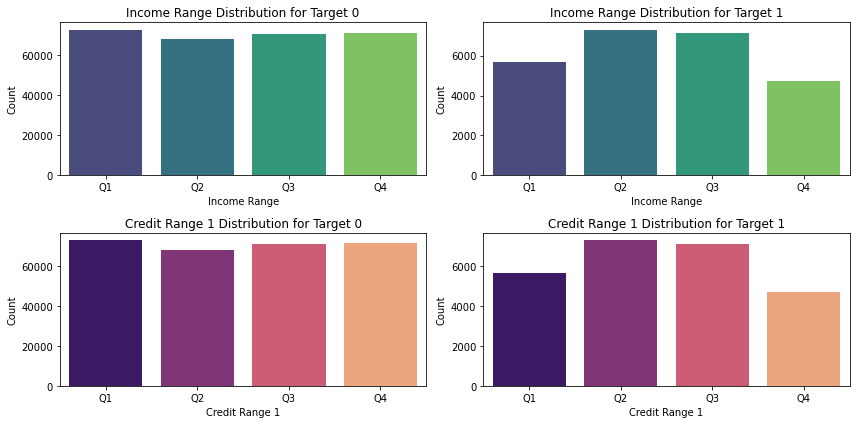

In [35]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.countplot(data=df_0, x='CREDIT_EQUAL_FREQ_RANGE', palette='viridis')
plt.title('Income Range Distribution for Target 0')
plt.xlabel('Income Range')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
sns.countplot(data=df_1, x='CREDIT_EQUAL_FREQ_RANGE', palette='viridis')
plt.title('Income Range Distribution for Target 1')
plt.xlabel('Income Range')
plt.ylabel('Count')

plt.subplot(2, 2, 3)
sns.countplot(data=df_0, x='CREDIT_EQUAL_FREQ_RANGE', palette='magma')
plt.title('Credit Range 1 Distribution for Target 0')
plt.xlabel('Credit Range 1')
plt.ylabel('Count')

plt.subplot(2, 2, 4)
sns.countplot(data=df_1, x='CREDIT_EQUAL_FREQ_RANGE', palette='magma')
plt.title('Credit Range 1 Distribution for Target 1')
plt.xlabel('Credit Range 1')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Univeriate Analysis

 Univariate analysis is a statistical method used to analyze the relationship between a single independent variable (also known as a predictor variable) and one or more dependent variables (outcomes or responses). 

In [36]:
numerical_columns = app_data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = app_data.select_dtypes(include=['object']).columns

- **Univeriate Analysis for numerical columns**

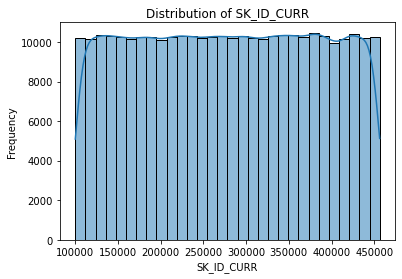

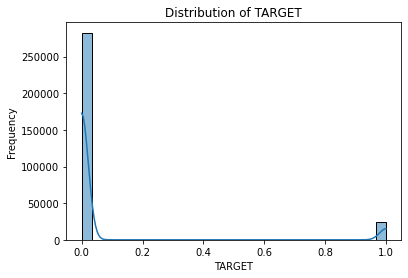

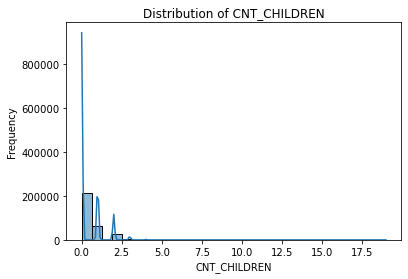

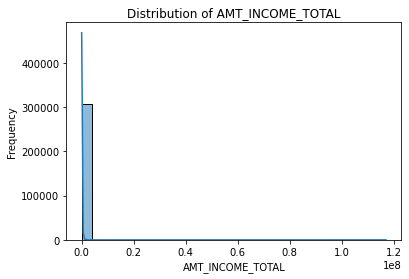

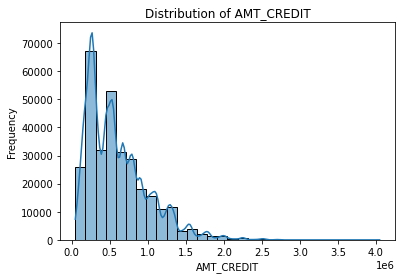

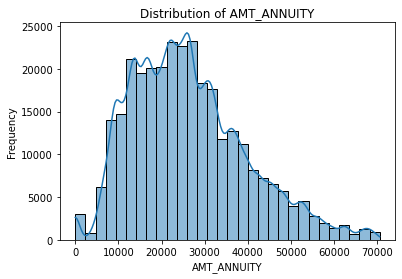

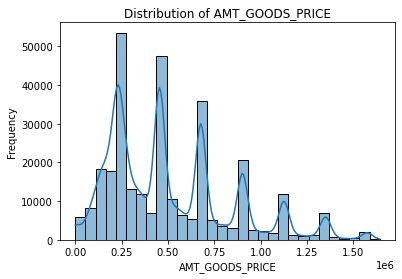

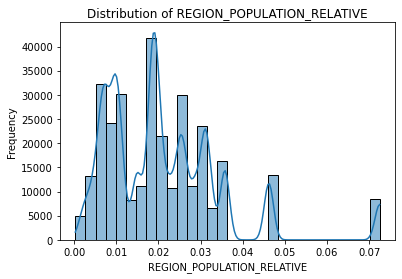

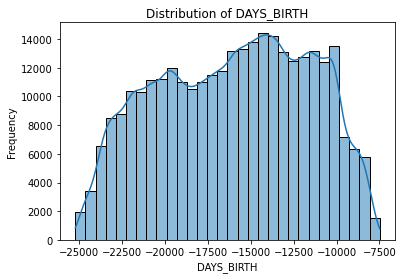

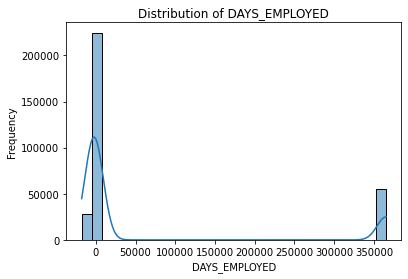

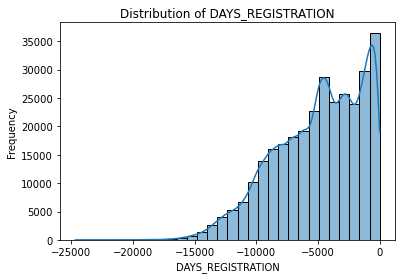

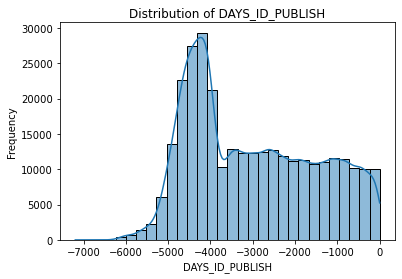

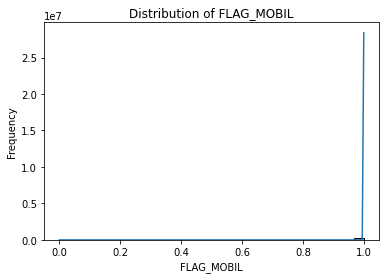

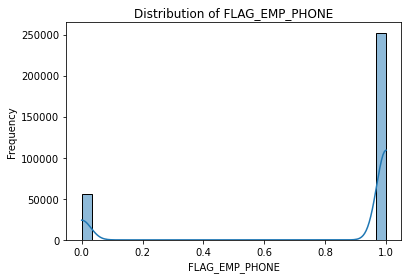

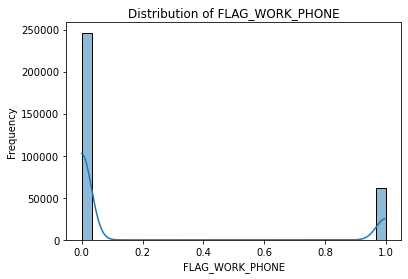

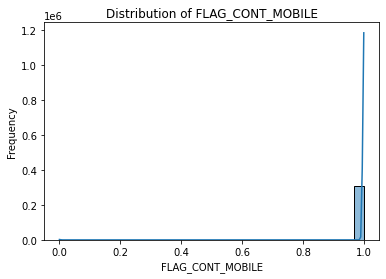

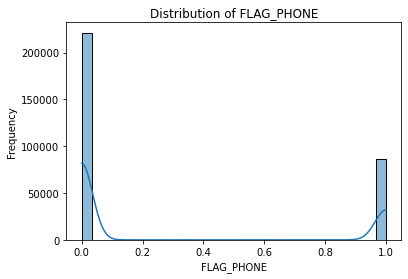

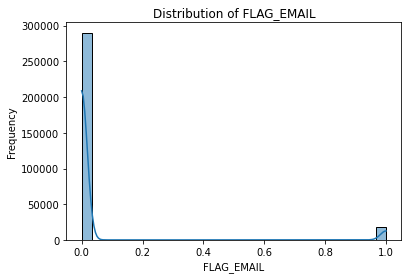

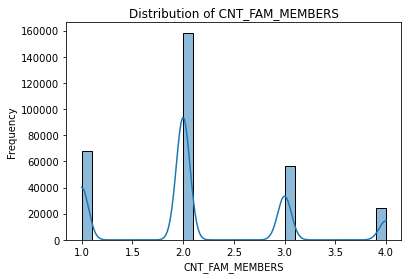

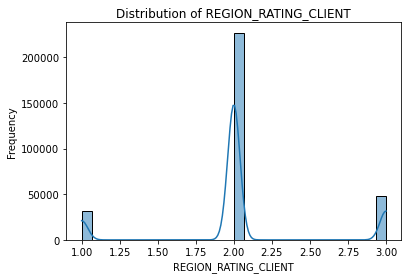

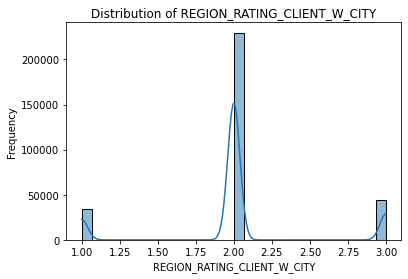

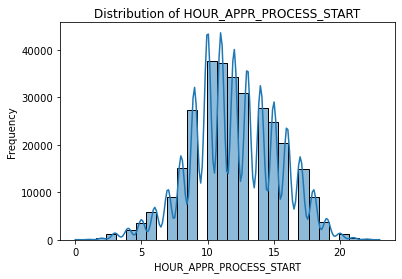

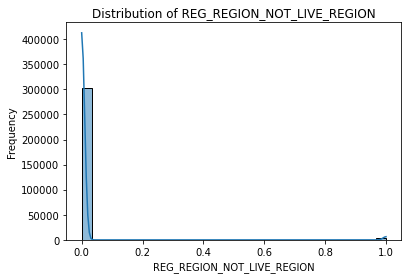

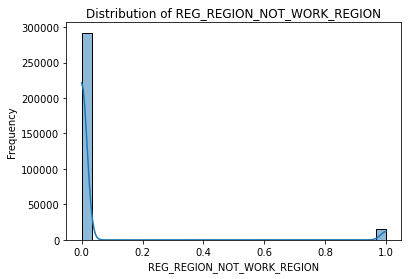

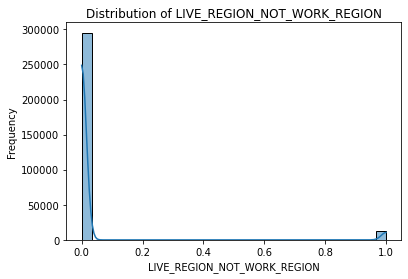

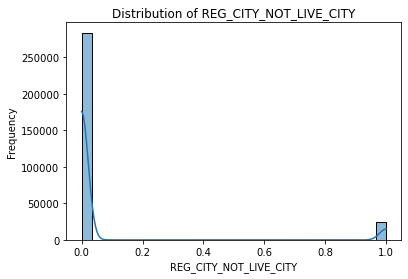

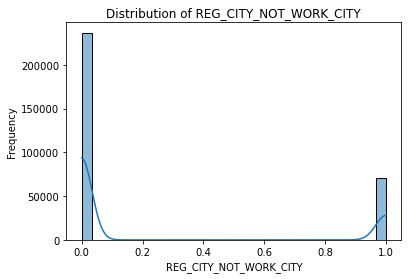

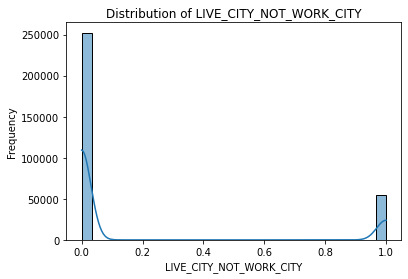

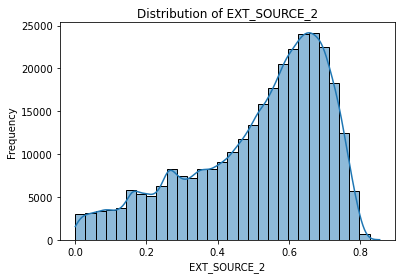

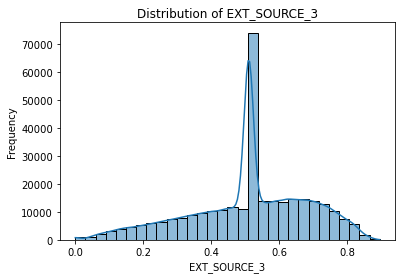

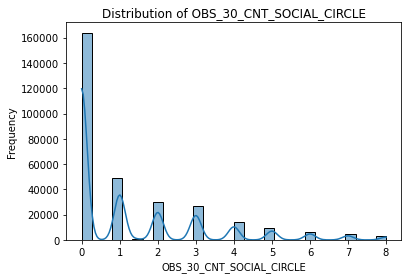

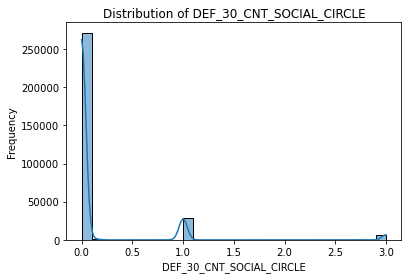

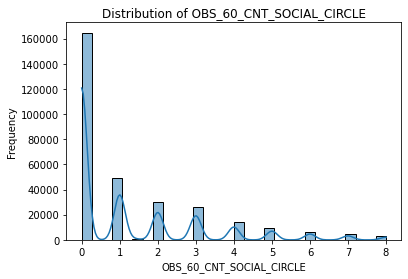

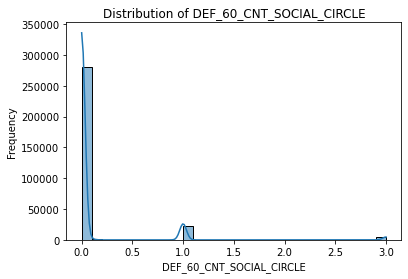

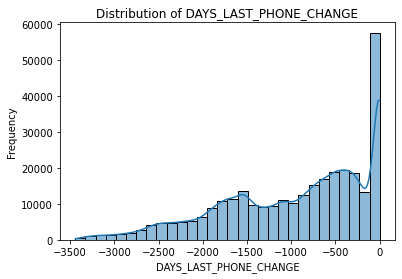

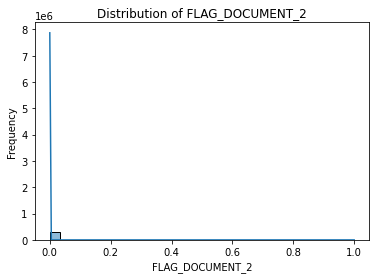

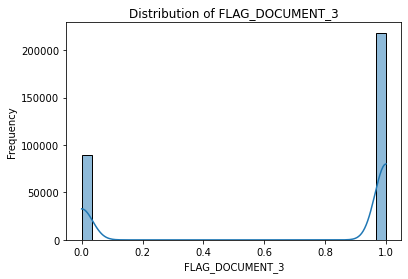

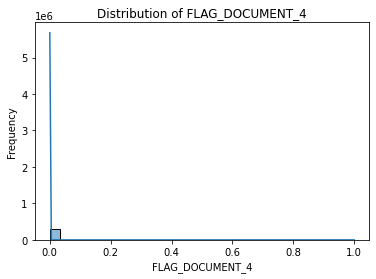

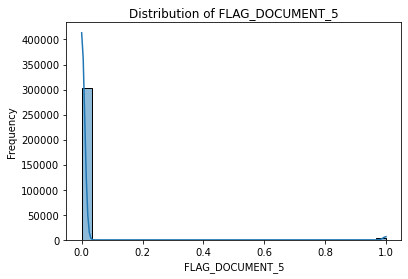

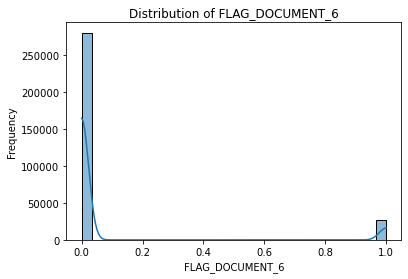

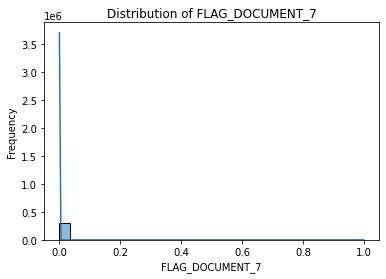

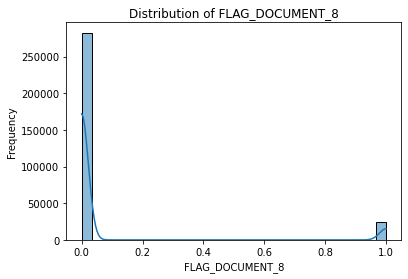

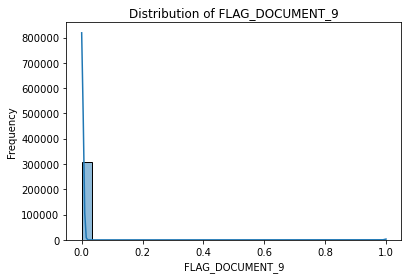

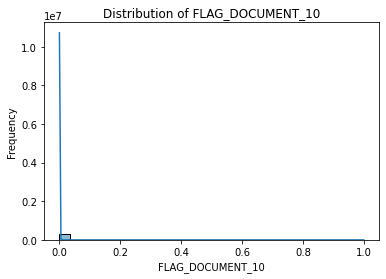

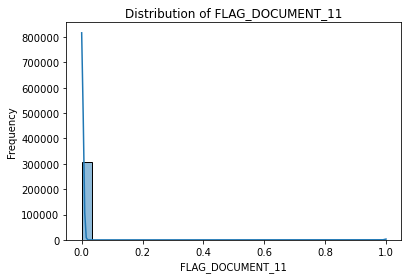

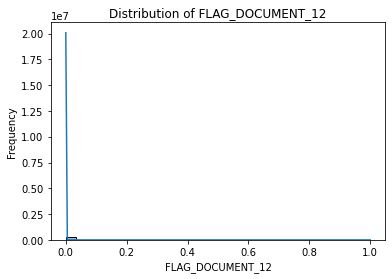

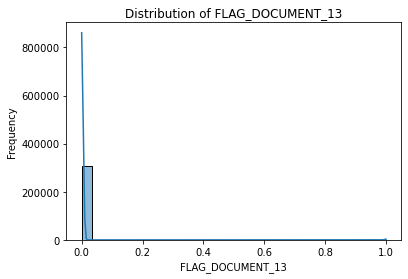

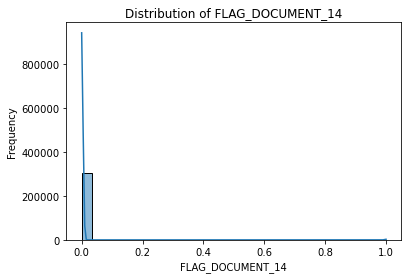

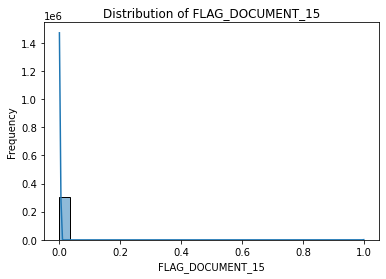

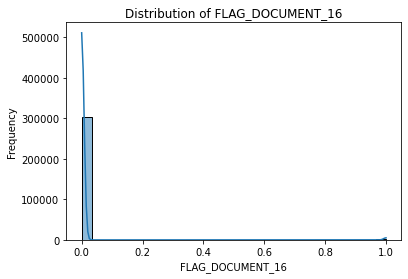

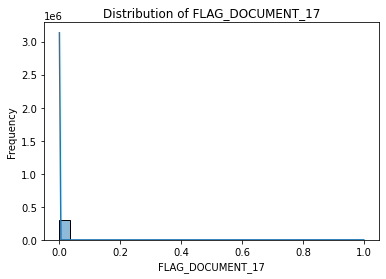

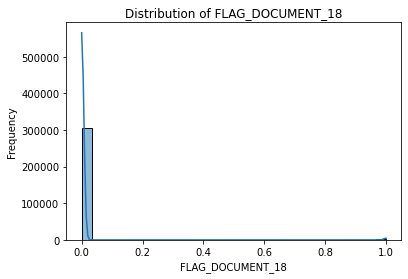

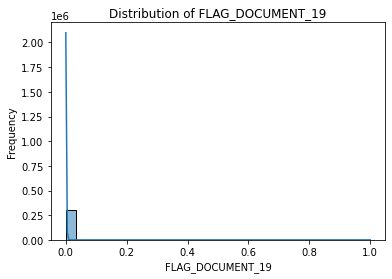

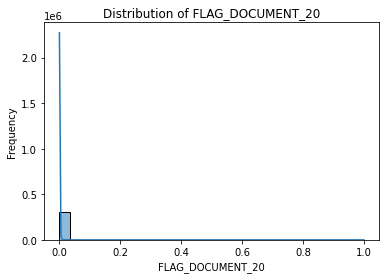

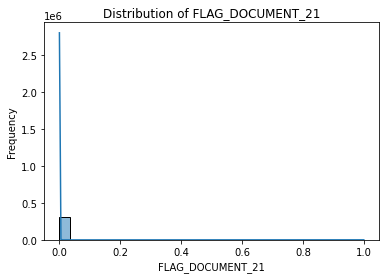

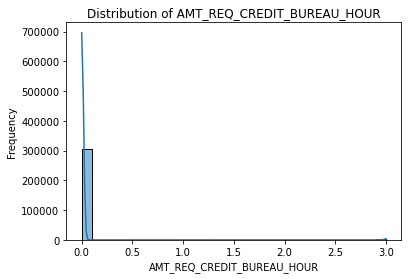

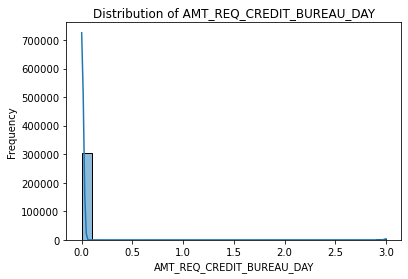

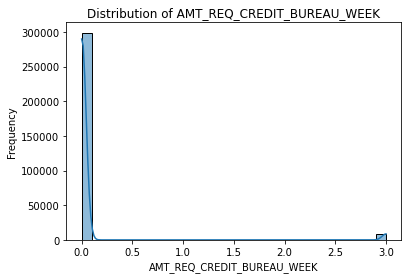

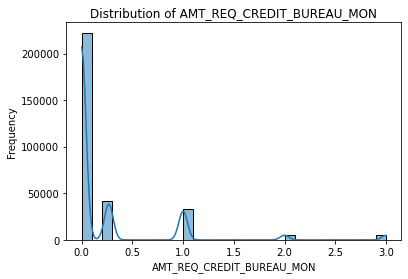

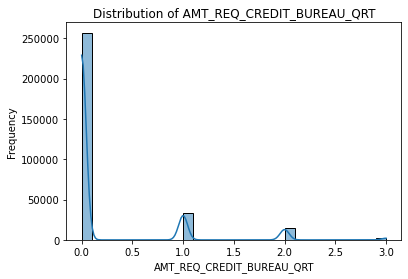

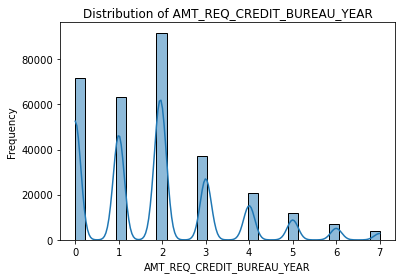

In [37]:
for column in numerical_columns:
    g = sns.histplot(app_data[column], bins=30, kde=True)
    g.set_title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

- **Univeriate Analysis for categorical columns**

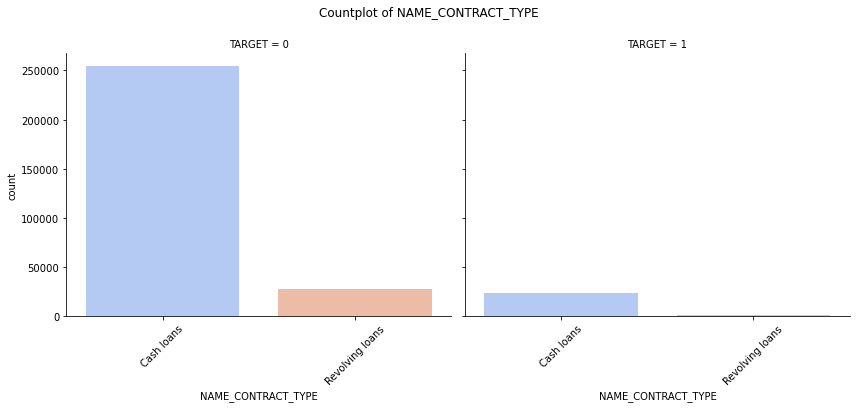

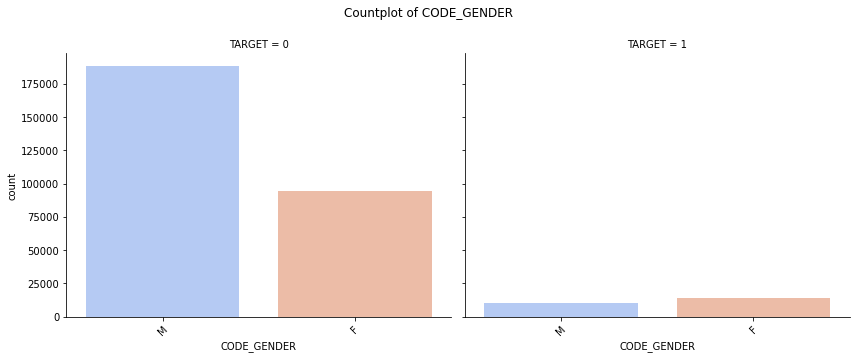

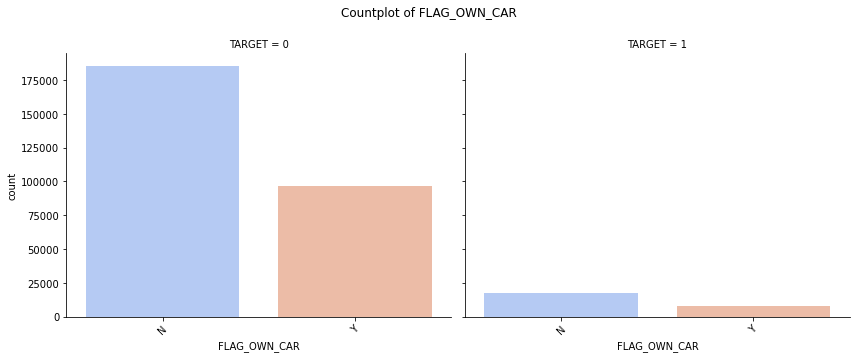

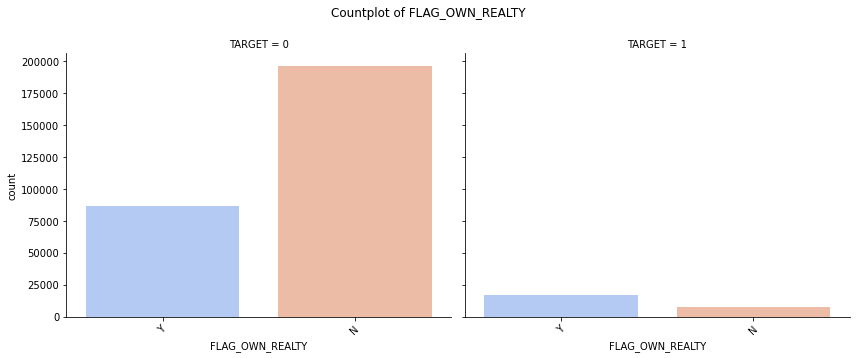

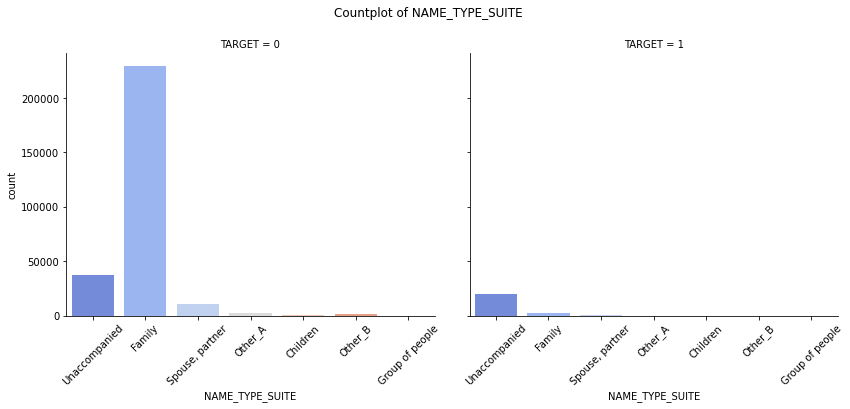

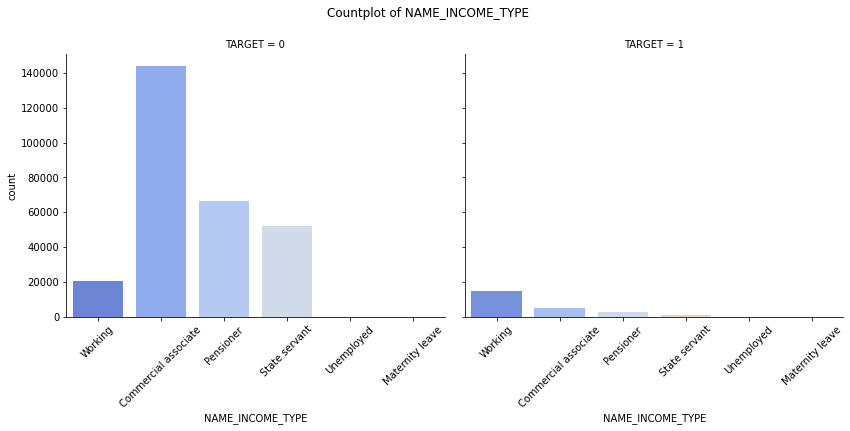

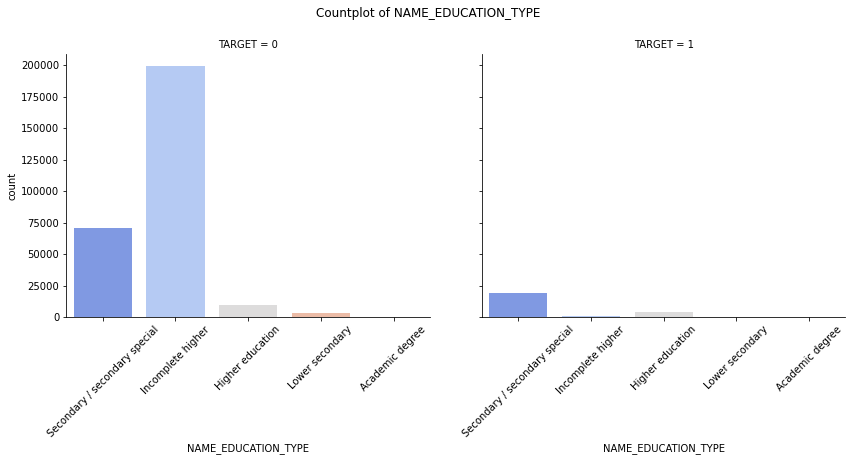

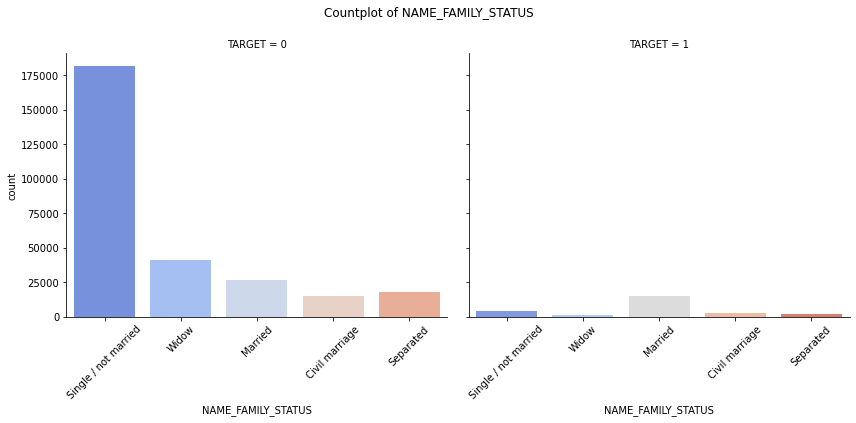

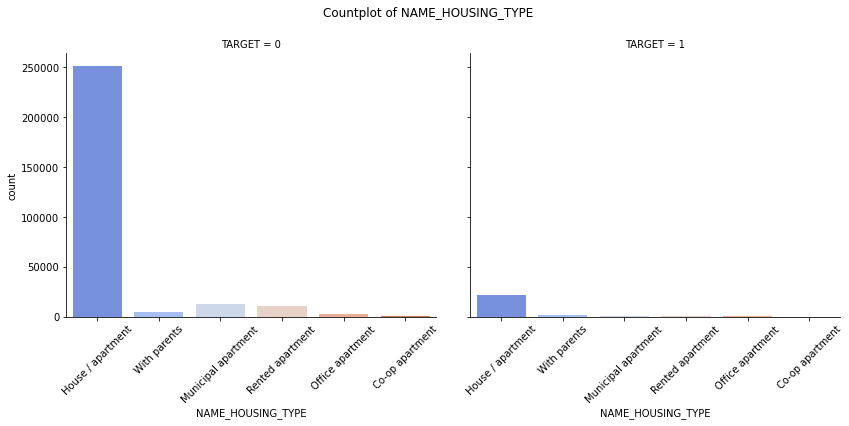

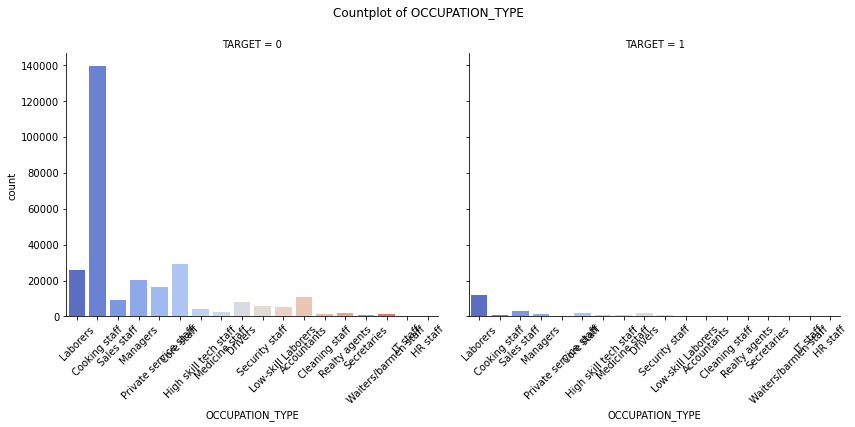

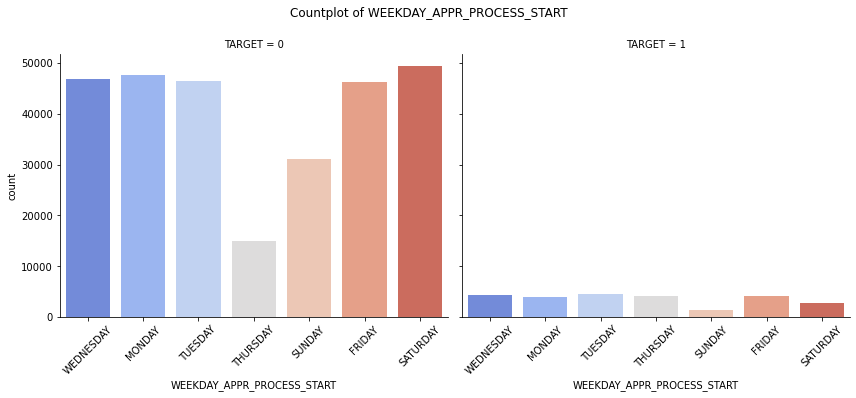

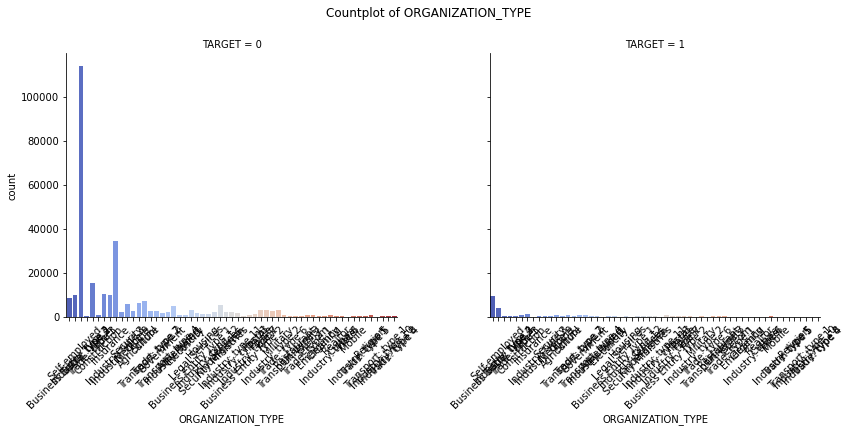

In [38]:
for column in categorical_columns:
    g = sns.FacetGrid(app_data, col='TARGET', height=5, aspect=1.2)
    g.map(sns.countplot, column, palette='coolwarm')
    g.set_xticklabels(rotation=45)
    plt.subplots_adjust(top=0.85)
    g.fig.suptitle(f'Countplot of {column}')
    plt.show()

## Biverate analysis
Biverate analysis is a statistical method used to measure the magnitude and direction of relationships between two variables. This technique is used in various fields such as psychology, sociology, and business. It involves decomposing the variance in one variable into components related to the other variable. Biverate analysis can be done using regression analysis or correlation analysis. This technique can be used to determine the strength and direction of relationships between variables in various contexts.  

- **NAME_CONTRACT_TYPE visualizaion with respect to TARGET variable** 

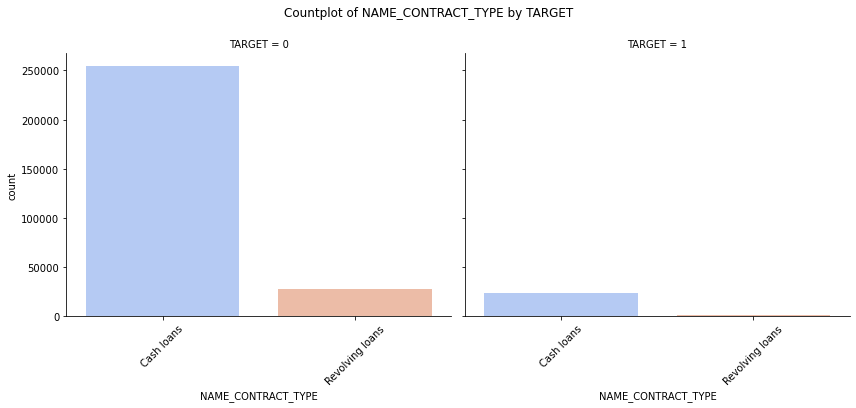

In [39]:
column = 'NAME_CONTRACT_TYPE'
g = sns.FacetGrid(app_data, col='TARGET', height=5, aspect=1.2)
g.map(sns.countplot, column, palette='coolwarm')
g.set_xticklabels(rotation=45)
plt.subplots_adjust(top=0.85)
g.fig.suptitle(f'Countplot of {column} by TARGET')
plt.show()

<AxesSubplot:xlabel='NAME_CONTRACT_TYPE', ylabel='TARGET'>

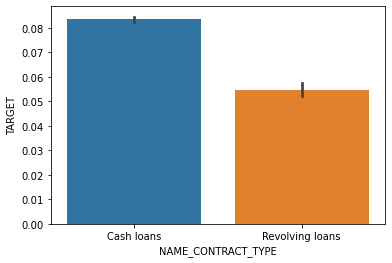

In [40]:
sns.barplot(x=app_data['NAME_CONTRACT_TYPE'], y=app_data['TARGET'])

The visual analysis indicates a higher prevalence of Cash loans among TARGET 0. Notably, there appears to be an absence of data related to Revolving loans for TARGET 1.

- **CODE_GENDER visualizaion with respect to TARGET variable** 

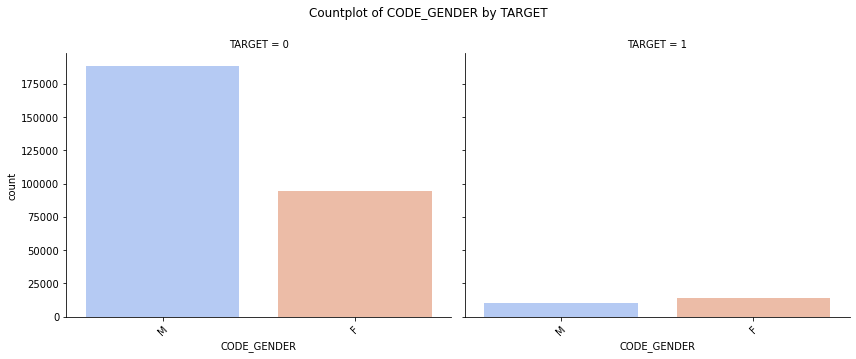

In [41]:
column = 'CODE_GENDER'
g = sns.FacetGrid(app_data, col='TARGET', height=5, aspect=1.2)
g.map(sns.countplot, column, palette='coolwarm')
g.set_xticklabels(rotation=45)
plt.subplots_adjust(top=0.85)
g.fig.suptitle(f'Countplot of {column} by TARGET')
plt.show()

From the division of genders within the Targets, it is evident that males are more inclined towards a lack of payment difficulties, whereas females are more frequently associated with payment difficulties.

- **FLAG_OWN_CAR visualizaion with respect to TARGET variable** 

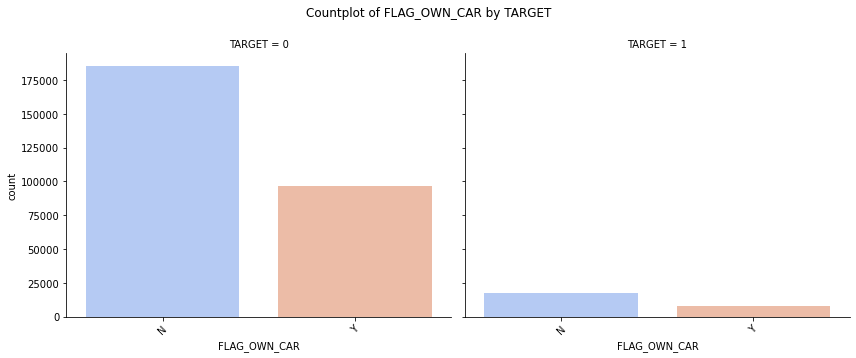

In [42]:
column = 'FLAG_OWN_CAR'
g = sns.FacetGrid(app_data, col='TARGET', height=5, aspect=1.2)
g.map(sns.countplot, column, palette='coolwarm')
g.set_xticklabels(rotation=45)
plt.subplots_adjust(top=0.85)
g.fig.suptitle(f'Countplot of {column} by TARGET')
plt.show()

- **FLAG_OWN_REALTY visualizaion with respect to TARGET variable** 

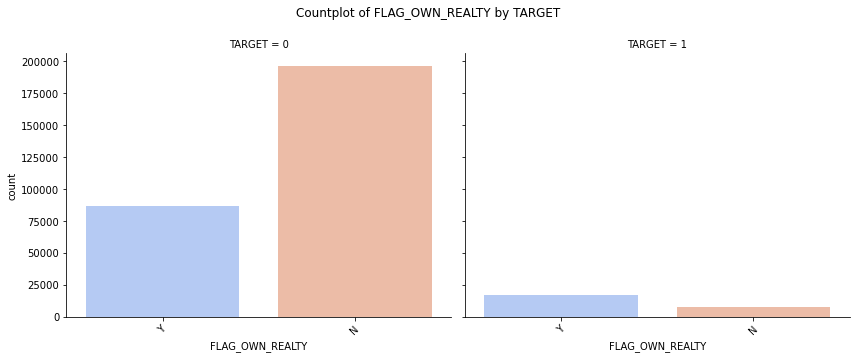

In [43]:
column = 'FLAG_OWN_REALTY'
g = sns.FacetGrid(app_data, col='TARGET', height=5, aspect=1.2)
g.map(sns.countplot, column, palette='coolwarm')
g.set_xticklabels(rotation=45)
plt.subplots_adjust(top=0.85)
g.fig.suptitle(f'Countplot of {column} by TARGET')
plt.show()

- **Average Income VS Income Type based on Target**

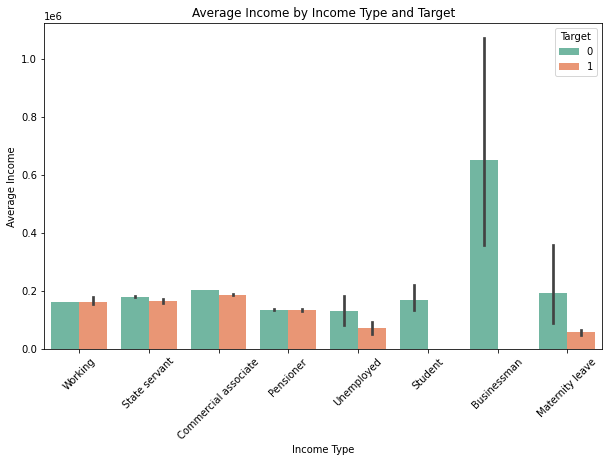

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(x='NAME_INCOME_TYPE', y='AMT_INCOME_TOTAL', hue='TARGET', data=app_data, palette='Set2')
plt.title('Average Income by Income Type and Target')
plt.xlabel('Income Type')
plt.ylabel('Average Income')
plt.xticks(rotation=45)
plt.legend(title='Target', loc='upper right')
plt.show()


The data visibly indicates that Businessmen tend to have the highest income and don't face payment difficulties. Conversely, Commercial Associates are more prone to encountering payment difficulties despite being the highest in number.

- **Gender VS Target**

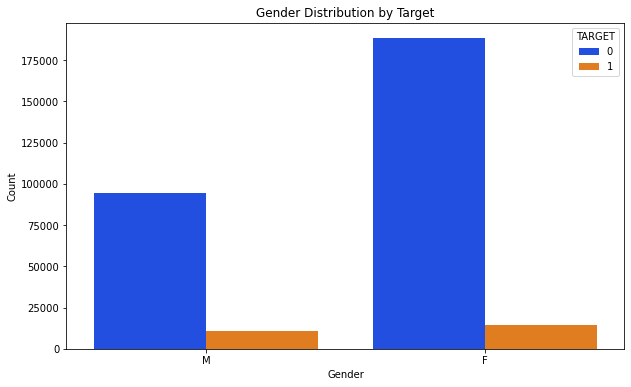

In [45]:
plt.figure(figsize=(10, 6))
sns.countplot(data=app_data, x='CODE_GENDER', hue='TARGET', palette='bright')
plt.title('Gender Distribution by Target')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


- **Distribution of Targets with Income Types**

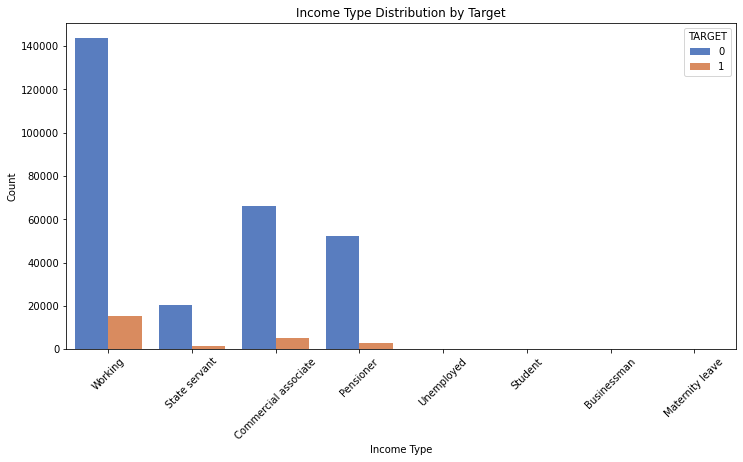

In [46]:
plt.figure(figsize=(12, 6))
sns.countplot(data=app_data, x='NAME_INCOME_TYPE', hue='TARGET', palette='muted')
plt.title('Income Type Distribution by Target')
plt.xlabel('Income Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Conclusion

1. **Targeting Female Customers:** The bank should prioritize its focus on female clientele based on the observed data.
   
2. **Avoiding Commercial Associates:** Commercial Associates exhibit higher incidences of repayment issues, suggesting caution or alternative approaches while engaging with this group.
   
3. **Targeting Businessmen:** Given the 100% repayment rate, the bank could consider intensifying efforts to attract Businessmen as they display a strong commitment to making payments without difficulties.